In [1]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display

# seaborn
import seaborn as sns

# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode="fixed")
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams["figure.figsize"] = (6, 6)
# 方眼表示ON
plt.rcParams["axes.grid"] = True
# データフレームでの表示精度
pd.options.display.float_format = "{:.3f}".format
# データフレームですべての項目を表示
pd.set_option("display.max_columns", None)

In [2]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArViz v{az.__version__}")

Running on PyMC v5.25.1
Running on ArViz v0.22.0


In [3]:
# LSL-DR データ読み込み
df = pd.read_csv(pm.get_data("test_scores.csv"), index_col=0)

# 結果確認
display(df.head())

,score,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
0,40,0,2.000,2.000,False,NaN,55,1.000,NaN,False,False
1,31,1,0.000,NaN,False,0.000,53,0.000,0.000,False,False
2,83,1,1.000,1.000,True,0.000,52,1.000,NaN,False,True
3,75,0,3.000,NaN,False,0.000,55,0.000,1.000,False,False
5,62,0,0.000,4.000,False,1.000,50,0.000,NaN,False,False


([<matplotlib.axis.XTick at 0x13f28e980>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140')])

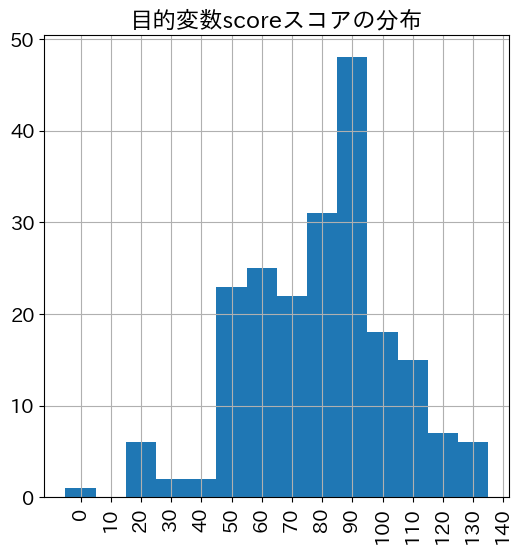

In [4]:
bins = np.arange(0, 150, 10)
fig, ax = plt.subplots()
df["score"].hist(bins=bins, align="left")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("目的変数scoreスコアの分布")
plt.xticks(bins)

In [5]:
df.describe()

,score,male,siblings,family_inv,prev_disab,age_test,non_severe_hl,mother_hs
count,207.000,207.000,207.000,174.000,189.000,207.000,207.000,134.000
mean,84.193,0.512,1.126,0.977,0.238,53.546,0.415,0.701
std,24.886,0.501,0.867,1.003,0.427,3.632,0.494,0.459
min,0.000,0.000,0.000,0.000,0.000,48.000,0.000,0.000
25%,68.000,0.000,1.000,0.000,0.000,50.000,0.000,0.000
50%,87.000,1.000,1.000,1.000,0.000,54.000,0.000,1.000
75%,98.000,1.000,2.000,2.000,0.000,57.000,1.000,1.000
max,144.000,1.000,3.000,4.000,1.000,59.000,1.000,1.000


In [6]:
# データ件数の確認
print(f"データ件数 {len(df)}\n")

# 欠損値値の確認
print(df.isnull().sum())

データ件数 207

score             0
male              0
siblings          0
family_inv       33
non_english       0
prev_disab       18
age_test          0
non_severe_hl     0
mother_hs        73
early_ident       0
non_white         0
dtype: int64


In [7]:
# 欠損値除去
df1 = df.dropna().astype(float)

# データ件数の確認
print(f"データ件数 {len(df1)}")

データ件数 101


In [8]:
y = df1.pop("score")
X = df1.copy()

# Xの結果確認
display(X.head())

,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
7,0.000,2.000,3.000,1.000,1.000,50.000,1.000,1.000,0.000,1.000
12,1.000,1.000,0.000,0.000,0.000,48.000,1.000,1.000,1.000,0.000
14,0.000,2.000,0.000,0.000,0.000,58.000,1.000,1.000,1.000,1.000
19,1.000,0.000,2.000,0.000,0.000,50.000,1.000,1.000,0.000,1.000
21,1.000,1.000,2.000,0.000,1.000,58.000,0.000,0.000,1.000,1.000


In [9]:
X -= X.mean()
X /= X.std()

# 結果確認
display(X.head())

,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
7,-1.005,1.078,2.228,2.480,1.782,-0.978,1.179,0.616,-0.773,1.133
12,0.985,-0.080,-0.912,-0.399,-0.556,-1.562,1.179,0.616,1.281,-0.874
14,-1.005,1.078,-0.912,-0.399,-0.556,1.360,1.179,0.616,1.281,1.133
19,0.985,-1.239,1.181,-0.399,-0.556,-0.978,1.179,0.616,-0.773,1.133
21,0.985,-0.080,1.181,-0.399,1.782,1.360,-0.840,-1.607,1.281,1.133


In [10]:
# データ件数とデータ項目数の設定
N, D = X.shape

# 項目名一覧をcolumnsに設定する
columns = X.columns.values

# 結果確認
print(f"N: {N} (データ件数)\n")
print(f"D: {D} (説明変数項目数)\n")
print(f"項目名一覧: {columns}")

N: 101 (データ件数)

D: 10 (説明変数項目数)

項目名一覧: ['male' 'siblings' 'family_inv' 'non_english' 'prev_disab' 'age_test'
 'non_severe_hl' 'mother_hs' 'early_ident' 'non_white']


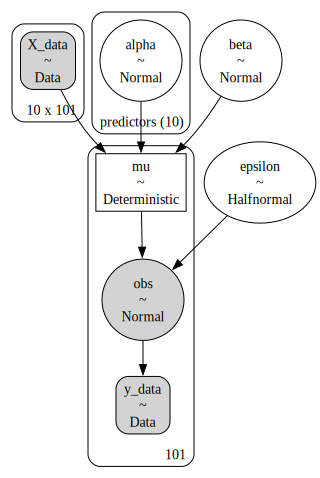

In [11]:
# 説明変数リストを predictors として定義し、PyMC の座標系(coords)に登録する。
# coords を使うと、パラメータの次元に「名前付き軸」を与えられるため、
# alpha の各要素がどの説明変数に対応するかを理論・実装の両面で追跡しやすくなる。
# ここで columns は説明変数名の配列（例：["x1","x2",...]）を想定している。
model1 = pm.Model(coords={"predictors": columns})

with model1:
    # X の観測値を pm.Data としてモデルに渡す。
    # pm.Data にしておくと、推論後に set_data で入力 X を差し替え、
    # 事後予測 p(y_new | X_new, posterior) を計算できる。
    #
    # 注意点として、ここでは X.T と転置している。
    # PyMC の線形代数（alpha @ X_data）に合わせ、
    # X_data を「(説明変数数, サンプル数)」の形にしているためである。
    # つまり、各列（転置後の行）が1つの説明変数の系列に対応する。
    X_data = pm.Data("X_data", X.T)

    # y を目的変数として pm.Data に登録する。
    # 回帰モデルでは「X は条件として固定し、p(y | X, θ) を推論する」
    # という立場を取るので、y_data は観測済みの応答変数を表す。
    y_data = pm.Data("y_data", y)

    # 重回帰の回帰係数 alpha を定義する。
    # 単回帰ではスカラーだったが、重回帰では説明変数ごとに係数が必要なのでベクトルになる。
    # dims='predictors' により、alpha の長さは coords の predictors に自動的に一致し、
    # 各要素 alpha[j] が predictors[j] に対応するようにラベル付けされる。
    #
    # 事前分布 Normal(0, 10) は「係数は0付近にあり得るが、ある程度の大きさも許容する」
    # という弱情報的事前に相当する。
    # 標準化済みの特徴量を使う場合、スケール的にも妥当な幅になりやすい。
    alpha = pm.Normal("alpha", mu=0.0, sigma=10.0, dims="predictors")

    # 切片 beta と誤差の標準偏差 epsilon を定義する。
    # beta は回帰平面のオフセット（全説明変数が0のときの期待値）に対応する。
    # beta ~ Normal(100, 25) は、目的変数 y の典型的スケールが 100 前後という
    # 事前知識を反映した情報的事前になっている。
    #
    # epsilon ~ HalfNormal(25) は標準偏差が非負である制約を満たすための事前であり、
    # 「ノイズは25程度までが比較的ありやすい」という弱い事前信念を表す。
    beta = pm.Normal("beta", mu=100.0, sigma=25.0)
    epsilon = pm.HalfNormal("epsilon", sigma=25.0)

    # 線形予測子 mu を計算し、Deterministic ノードとしてモデル内に明示する。
    # 単回帰の mu_i = alpha * X_i + beta が、
    # 重回帰では mu_i = sum_j alpha_j * X_{ij} + beta に拡張される。
    # ここでは行列演算として alpha @ X_data + beta と書かれており、
    # alpha（(説明変数数,)）と X_data（(説明変数数, サンプル数)）の内積で
    # サンプルごとの期待値ベクトル mu（(サンプル数,)）を作っている。
    #
    # mu を切り出しておくと、事後から「回帰平面の不確実性」や
    # 事後平均の予測値を直接扱える利点がある。
    mu = pm.Deterministic("mu", alpha @ X_data + beta)

    # 観測モデル（尤度）を定義する。
    # 各サンプル i について
    #   y_i | alpha, beta, epsilon, X_i ~ Normal(mu_i, epsilon^2)
    # というガウス回帰を仮定している。
    # これは古典的な線形回帰の誤差モデルをそのままベイズ化したものであり、
    # 事後分布は「尤度 × 事前」の積に比例する形で決まる。
    obs = pm.Normal("obs", mu=mu, sigma=epsilon, observed=y_data)

# モデルの確率グラフィカルモデルを可視化する。
# 係数 alpha（ベクトル）、切片 beta、ノイズ epsilon から
# 線形予測子 mu を経由して観測 obs が生成される階層構造が図に表れる。
g = pm.model_to_graphviz(model1)
display(g)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


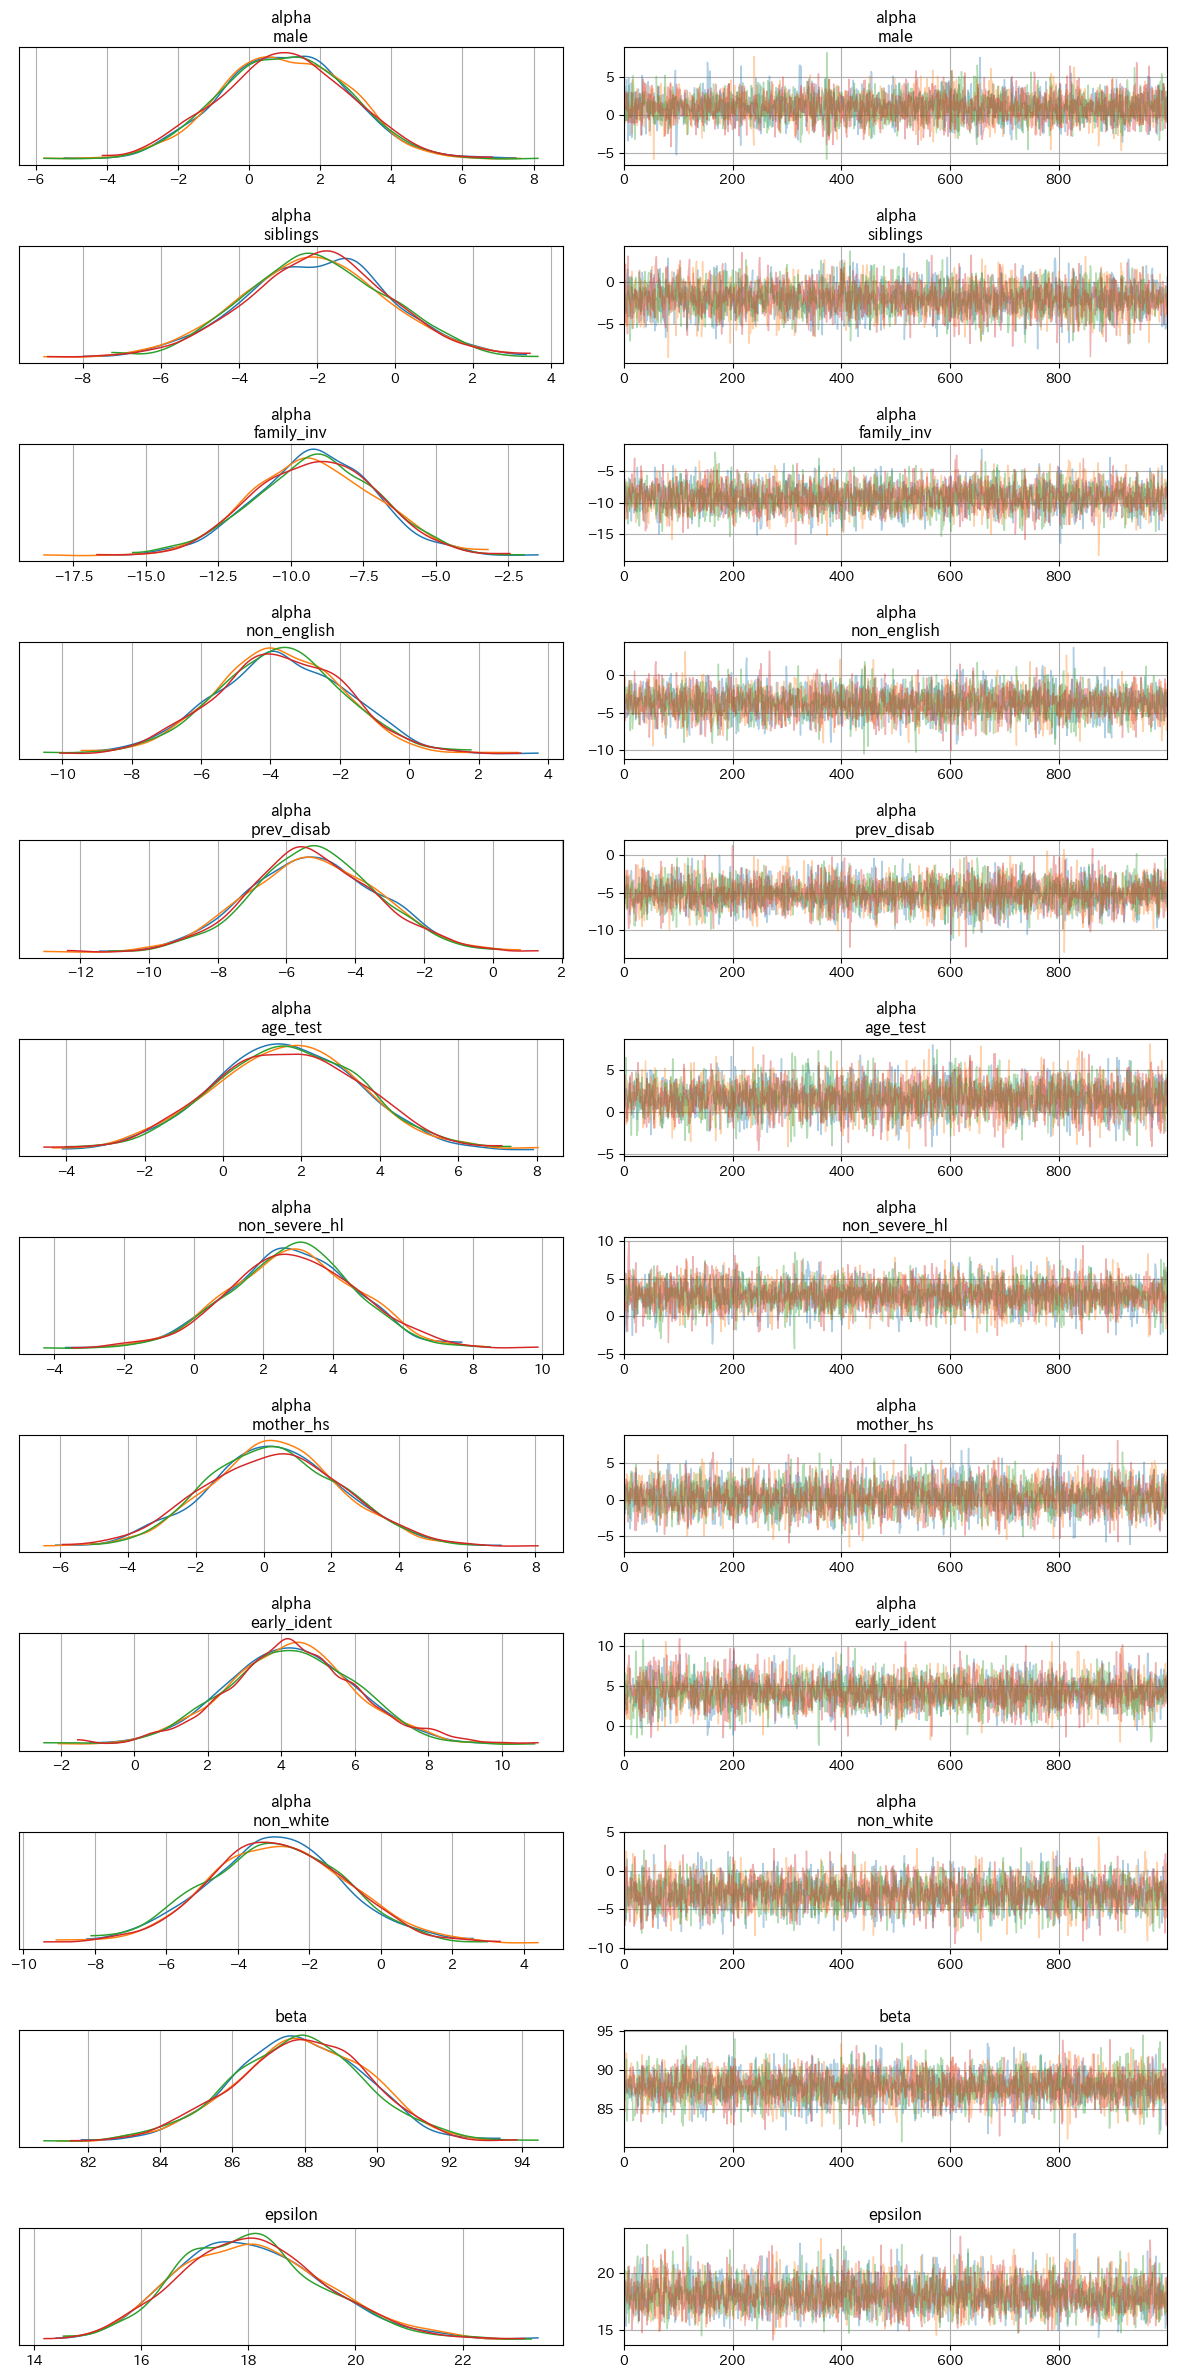

In [12]:
with model1:
    idata1 = pm.sample(random_seed=42, target_accept=0.95)

# plot_trace関数で推論結果の確認
az.plot_trace(idata1, var_names=["alpha", "beta", "epsilon"], compact=False)
plt.tight_layout()

In [13]:
summary1 = az.summary(idata1, var_names=["alpha"])
display(summary1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[male],1.001,1.782,-2.357,4.194,0.025,0.031,5169.000,2972.000,1.000
alpha[siblings],-2.006,1.831,-5.379,1.504,0.029,0.026,4024.000,3181.000,1.000
alpha[family_inv],-9.151,2.119,-13.159,-5.262,0.035,0.031,3748.000,3165.000,1.000
alpha[non_english],-3.731,1.855,-7.087,-0.210,0.029,0.028,4091.000,3295.000,1.000
alpha[prev_disab],-5.203,1.866,-8.916,-1.902,0.028,0.029,4339.000,2876.000,1.000
alpha[age_test],1.623,1.893,-1.951,5.085,0.029,0.030,4252.000,2761.000,1.000
alpha[non_severe_hl],2.841,1.821,-0.504,6.263,0.027,0.030,4620.000,2836.000,1.000
alpha[mother_hs],0.329,2.001,-3.210,4.223,0.033,0.029,3729.000,3102.000,1.000
alpha[early_ident],4.269,1.825,1.044,7.967,0.030,0.032,3867.000,2797.000,1.000
alpha[non_white],-2.919,1.931,-6.537,0.682,0.031,0.030,3925.000,2899.000,1.000


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

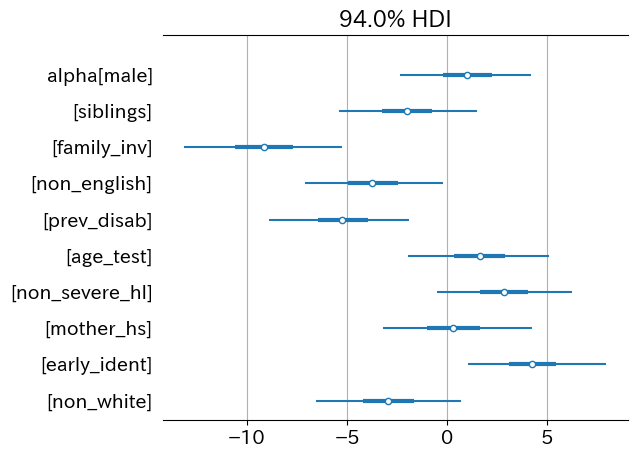

In [14]:
az.plot_forest(idata1, combined=True, var_names=["alpha"])

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

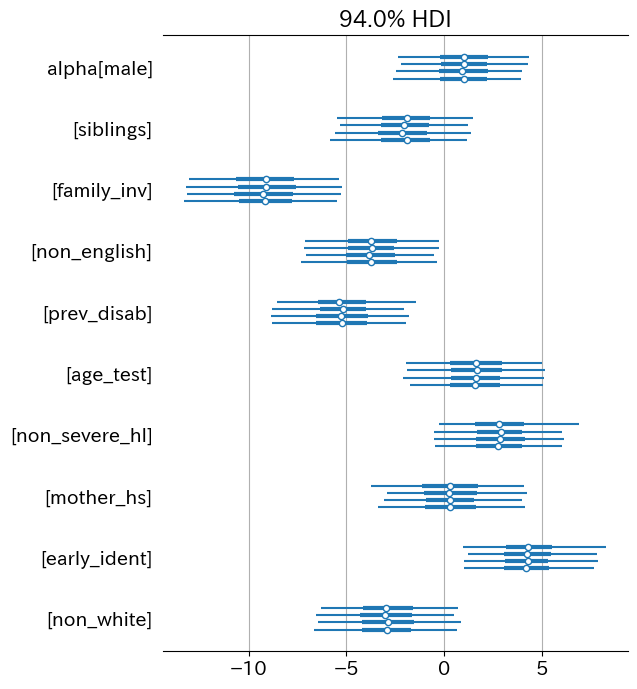

In [15]:
az.plot_forest(idata1, var_names=["alpha"])